In [ ]:
!pip install kaggle

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle competitions download -c dogs-vs-cats

User cancelled operation


In [ ]:
#extracting the compressed file

from zipfile import ZipFile
dataset = '/content/dogs-vs-cats.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

KeyboardInterrupt: 

In [ ]:
from zipfile import ZipFile
dataset = '/content/train.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')



In [ ]:
from zipfile import ZipFile
dataset = '/content/test1.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('done')

In [ ]:
import os
path,dirs,files = next(os.walk('/content/train'))
file_count = len(files)
print(file_count)
path,dirs,files = next(os.walk('/content/test1'))
file_count = len(files)
print(file_count)

25000
12500


In [ ]:
file_names = os.listdir('/content/train')
print(file_names[:10])

['dog.7476.jpg', 'cat.4386.jpg', 'dog.180.jpg', 'dog.11327.jpg', 'cat.1337.jpg', 'dog.7978.jpg', 'cat.8383.jpg', 'dog.7666.jpg', 'dog.9250.jpg', 'cat.11304.jpg']


In [ ]:
import numpy as np
import PIL as Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

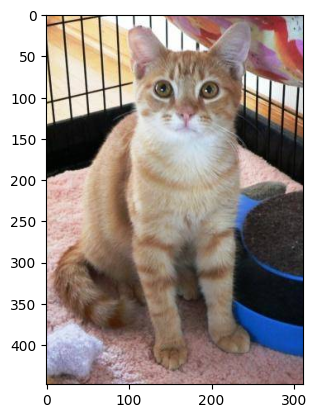

In [ ]:
img = mpimg.imread('/content/train/cat.1337.jpg')
plt.imshow(img)

In [ ]:
cats , dogs =0,0;
for i in file_names:
  if(i.split('.')[0]=='cat'):
    cats+=1;
  else:
    dogs+=1;
print(cats)
print(dogs)

12500
12500


In [ ]:
#resize  all images tp particular pixels
os.mkdir('/content/image resized')

FileExistsError: [Errno 17] File exists: '/content/image resized'

In [ ]:
from PIL import Image
import os

original_directory = '/content/train'
resized = '/content/image resized/'

filenames = os.listdir(original_directory)

for i in range(2000):
  filename = filenames[i]
  img_path = img_path = os.path.join(original_directory, filename)


  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newimgpath = img_path = os.path.join(resized, filename)

  img.save(newimgpath)


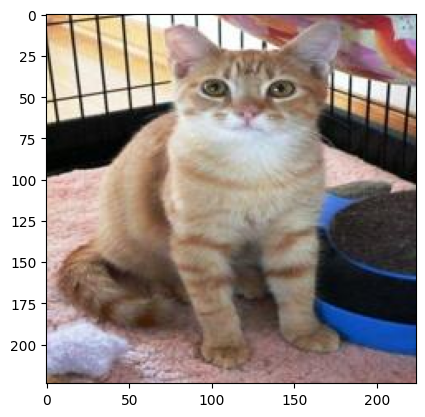

In [ ]:
img = mpimg.imread('/content/image resized/cat.1337.jpg')
plt.imshow(img)

In [ ]:
#creating th labels for resized images for dogs - 1 and cats - 0
filenames = os.listdir('/content/image resized/')
label = []
dogs , cats =0,0;
for i in range(2000):
  file_name = filenames[i]

  if file_name.split('.')[0]=='cat':
    label.append(0)
    cats+=1;
  else:
    label.append(1)
    dogs+=1;


In [ ]:
print(label[:10])
print(filenames[:10])
print(cats)
print(dogs)

[1, 0, 1, 1, 0, 1, 0, 1, 1, 0]
['dog.7476.jpg', 'cat.4386.jpg', 'dog.180.jpg', 'dog.11327.jpg', 'cat.1337.jpg', 'dog.7978.jpg', 'cat.8383.jpg', 'dog.7666.jpg', 'dog.9250.jpg', 'cat.11304.jpg']
1012
988


In [ ]:
#converting img to numpy arrys

import cv2
import glob

img_directory = '/content/image resized/'
image_extension =['png','jpg']

files =[]

[files.extend(glob.glob(img_directory+'*.'+e)) for e in image_extension]

dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [ ]:
dog_cat_images.shape

(2000, 224, 224, 3)

In [ ]:
x = dog_cat_images
y = label

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [ ]:
#scale the data
x_train = np.array(x_train)
x_test = np.array(x_test)
x_train_scaled = x_train/255.0
x_test_scaled = x_test/255.0

In [ ]:
print(x_test_scaled)

[[[[0.84705882 0.8745098  0.94117647]
   [0.65882353 0.68627451 0.75294118]
   [0.67058824 0.69803922 0.76470588]
   ...
   [0.27843137 0.4745098  0.34901961]
   [0.30196078 0.49803922 0.37254902]
   [0.31764706 0.51372549 0.38823529]]

  [[0.79607843 0.82352941 0.89019608]
   [0.62352941 0.65098039 0.71764706]
   [0.65098039 0.67843137 0.74509804]
   ...
   [0.31764706 0.51372549 0.38823529]
   [0.31372549 0.50980392 0.38431373]
   [0.24705882 0.44313725 0.31764706]]

  [[0.78039216 0.80784314 0.8745098 ]
   [0.63529412 0.6627451  0.72941176]
   [0.67843137 0.70588235 0.77254902]
   ...
   [0.25490196 0.44705882 0.32156863]
   [0.2627451  0.45490196 0.32941176]
   [0.21960784 0.41176471 0.28627451]]

  ...

  [[0.45882353 0.58039216 0.46666667]
   [0.10196078 0.22352941 0.10980392]
   [0.17647059 0.29803922 0.18431373]
   ...
   [0.20392157 0.3372549  0.21960784]
   [0.23137255 0.35294118 0.23921569]
   [0.23529412 0.36862745 0.25098039]]

  [[0.54509804 0.6627451  0.54901961]
   [0.1

**Building the Neural Network**

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-hub

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 811.1 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 6.3 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow 

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 615.5/615.5 MB 83.5 MB/s eta 0:00:01^C


In [2]:
import tensorflow as tf
import tensorflow_hub as hub

In [3]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(224,224,3), trainable=False)

In [4]:
num_of_classes = 2

model = tf.keras.Sequential([
    pretrained_model,
    tf.keras.layers.Dense(num_of_classes)

])

model.summary()

ValueError: Only instances of `keras.Layer` can be added to a Sequential model. Received: <tensorflow_hub.keras_layer.KerasLayer object at 0x7e7fdf217810> (of type <class 'tensorflow_hub.keras_layer.KerasLayer'>)